In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from tqdm.auto import tqdm
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/week4-practice-hackathon-2024/sample_submission.csv
/kaggle/input/week4-practice-hackathon-2024/Train.csv
/kaggle/input/week4-practice-hackathon-2024/Test.csv


In [2]:
train_df = pd.read_csv("/kaggle/input/week4-practice-hackathon-2024/Train.csv")

In [3]:
print(train_df.shape)

(40776, 32)


In [4]:
train_df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V45,V47,V50,V51,V52,V59,V63,V72,V75,class
0,0.0,1.0,243.0,29,4528.0,138.0,3.0,29,201.0,0.0,...,2,3,71.0,0,0,46.0,1,2,0,1
1,0.0,20.0,8.0,14,4183.0,183.0,4.0,26,156.0,0.0,...,5,7,20.0,0,2,13.0,9,6,0,1
2,14.0,2.0,2.0,9,1113.0,15.0,37.0,31,78.0,1.0,...,7,5,11.0,0,0,7.0,9,2,1,0
3,0.0,175.0,17.0,16,4250.0,68.0,8.0,30,152.0,0.0,...,1,3,0.0,1,1,31.0,6,4,5,1
4,2.0,-1.0,1.0,3,0.0,0.0,2.0,5,6.0,1.0,...,1,5,0.0,0,0,2.0,8,0,1,1


In [5]:
train_df.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V45,V47,V50,V51,V52,V59,V63,V72,V75,class
count,40776.000000,40776.000000,40776.000000,40776.000000,40776.000000,40776.000000,40776.000000,40776.000000,40776.000000,40776.000000,...,40776.000000,40776.000000,40776.000000,40776.000000,40776.000000,40776.00000,40776.000000,40776.000000,40776.00000,40776.000000
mean,4.167206,107.012041,28.035879,8.250221,1714.740092,76.849029,28.728124,17.533721,149.706837,0.736144,...,2.658598,6.238817,19.605233,3.231043,0.674563,19.08917,5.937071,3.171204,3.19482,0.501251
std,9.952973,389.279030,394.669313,8.942177,4789.147970,243.058478,83.490689,13.917054,272.661541,0.714021,...,2.680439,2.586094,71.480746,6.009488,0.710048,64.79848,2.014287,5.747578,5.77309,0.500005
min,0.000000,-2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000
25%,0.000000,1.000000,3.000000,2.000000,15.000000,4.000000,3.000000,6.000000,18.000000,0.000000,...,1.000000,5.000000,1.000000,1.000000,0.000000,1.00000,6.000000,1.000000,1.00000,0.000000
50%,1.000000,5.000000,7.000000,5.000000,401.000000,18.000000,8.000000,14.000000,59.000000,1.000000,...,1.000000,8.000000,4.000000,1.000000,1.000000,4.00000,6.000000,1.000000,1.00000,1.000000
75%,4.000000,42.000000,18.000000,11.000000,1658.000000,62.000000,23.000000,27.000000,166.000000,1.000000,...,5.000000,8.000000,14.000000,3.000000,1.000000,14.00000,7.000000,3.000000,3.00000,1.000000
max,816.000000,12274.000000,32743.000000,130.000000,373199.000000,14843.000000,4245.000000,52.000000,7082.000000,7.000000,...,8.000000,10.000000,4552.000000,136.000000,7.000000,2863.00000,13.000000,117.000000,136.00000,1.000000


from this, all you have to ensure is to check for outliers, jaise humne vo CnA wali data statistics wali videos m pdha tha

In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40776 entries, 0 to 40775
Data columns (total 32 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      40776 non-null  float64
 1   V2      40776 non-null  float64
 2   V3      40776 non-null  float64
 3   V4      40776 non-null  int64  
 4   V5      40776 non-null  float64
 5   V6      40776 non-null  float64
 6   V7      40776 non-null  float64
 7   V8      40776 non-null  int64  
 8   V9      40776 non-null  float64
 9   V10     40776 non-null  float64
 10  V11     40776 non-null  int64  
 11  V13     40776 non-null  float64
 12  V19     40776 non-null  int64  
 13  V22     40776 non-null  int64  
 14  V30     40776 non-null  int64  
 15  V33     40776 non-null  int64  
 16  V35     40776 non-null  int64  
 17  V36     40776 non-null  int64  
 18  V40     40776 non-null  float64
 19  V41     40776 non-null  int64  
 20  V42     40776 non-null  float64
 21  V43     40776 non-null  float64
 22

In [7]:
train_df.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V13', 'V19', 'V22', 'V30', 'V33', 'V35', 'V36', 'V40', 'V41', 'V42',
       'V43', 'V45', 'V47', 'V50', 'V51', 'V52', 'V59', 'V63', 'V72', 'V75',
       'class'],
      dtype='object')

In [8]:
X = train_df.drop(['class'], axis=1)
y = train_df['class']

In [9]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.3)

In [10]:
print(y_train.value_counts())

class
1    14302
0    14241
Name: count, dtype: int64


In [11]:
df=train_df.drop(['class'], axis=1)
correlation_matrix=df.corr()
correlation_matrix.shape

(31, 31)

<Axes: >

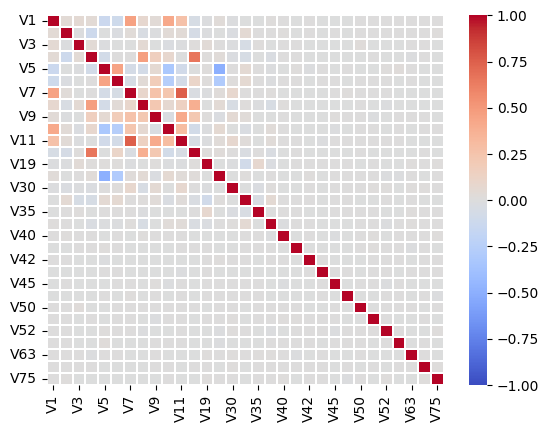

In [12]:
sns.heatmap(correlation_matrix, cmap='coolwarm', linewidth=.2, vmin=-1, vmax=1)


correlation matrix se we can say that no rows are related that much that we can simply drop them lolz

<Axes: >

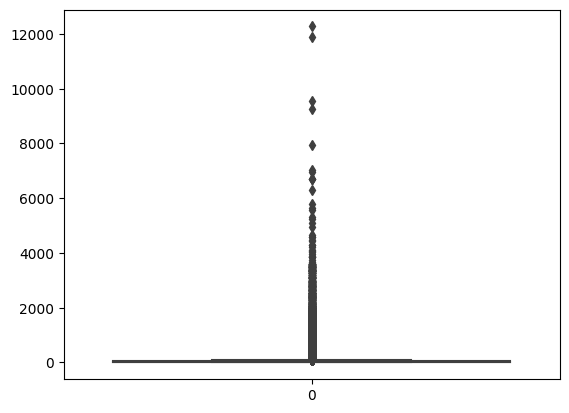

In [13]:
sns.boxplot(df.V2)

In [14]:
# lr=LogisticRegression(penalty='l1', solver='liblinear', max_iter = 3000)
# lr.fit(X_train, y_train)

In [15]:
# from sklearn.tree import DecisionTreeClassifier
# lr = DecisionTreeClassifier(max_depth=4)  # Adjust max_depth to control overfitting
# lr.fit(X_train, y_train)


In [16]:
from sklearn.ensemble import RandomForestClassifier
lr = RandomForestClassifier(n_estimators=90, max_depth=5)  # Adjust max_depth and n_estimators
lr.fit(X_train, y_train)


RandomForestClassifier(max_depth=5, n_estimators=90)

In [17]:
lr2=LogisticRegression(penalty='l2', solver='lbfgs', max_iter = 5000)
lr2.fit(X_train, y_train)

LogisticRegression(max_iter=5000)

we see l1 and l2 regularization-- f1 score par it has no effect at all

In [18]:
#we'll also check when we apply both regulalizations together!

In [19]:
y_pred = lr.predict(X_val)

In [20]:
f1 = f1_score(y_val, y_pred)
print(f"F1 score: {f1}")

F1 score: 0.6652047928577022


In [21]:
test_data = pd.read_csv("/kaggle/input/week4-practice-hackathon-2024/Test.csv")

In [22]:
test_data.shape

(17476, 32)

In [23]:
Index=test_data['Index']
test_data.drop(['Index'],axis=1,inplace=True)

In [24]:
y_test = lr.predict(test_data)

In [25]:
y_test

array([0, 0, 1, ..., 1, 0, 0])

In [26]:
result = pd.DataFrame({
    'Index': Index,
    'class': y_test
})

In [27]:
result

,Index,class
0,40977,0
1,24157,0
2,56238,1
3,55411,1
4,53175,0
...,...,...
17471,17197,1
17472,14094,0
17473,34598,1
17474,17845,0


In [28]:
result.to_csv("submission.csv", index=False) #(for making submission file)